# 1. Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import re

# 2. File import and df preparation

## 2.1 Setting datatime index

```df``` - original data frame

In [2]:
df= pd.read_csv('24-05jobsInfo.csv', index_col=0)
df = df.astype({'crawl_date':'datetime64'})
# scraped missing filter for todays ads, if data scraped correctly, no need to remove days from adsAge!
df['data_date'] = df['crawl_date']-pd.to_timedelta(df['adsAge'], unit='d')
df['data_date'] = df['data_date'].dt.normalize()
df.set_index(pd.DatetimeIndex(df['data_date']), inplace=True)
df = df.sort_index()

## 2.2 Excluding weekends

```df_week_jobs``` - original dataframe with weekends excluded

In [3]:
business_days = pd.date_range(start= df['data_date'].iloc[0], end= df['data_date'].iloc[-1], freq='B')
df_week_jobs = df.loc[business_days, :]

## 2.3 Creating dataframes for job_types and cities

```df_jobs_type``` - dataframe with all job types and overall amount of jobs posted  
```df_cities``` - dataframe with cities chosen for the dashboard

In [4]:
jobs_type = df_week_jobs.loc[:, 'jobs':'Auf Kommission'].columns.to_list()
jobs_type

['jobs',
 'Vollzeit',
 'Teilzeit',
 'Festanstellung',
 'Freie Mitarbeit',
 'Minijob',
 'Praktikum',
 'Befristet',
 'Ausbildung',
 'Werkvertrag',
 'Auf Kommission']

In [5]:
df_jobs_type = df_week_jobs.loc[:, jobs_type]
df_jobs_type

,jobs,Vollzeit,Teilzeit,Festanstellung,Freie Mitarbeit,Minijob,Praktikum,Befristet,Ausbildung,Werkvertrag,Auf Kommission
2020-04-24,174768,56822,30370,20939,1966,3387,1334,5241,1993,788,348
2020-04-27,170481,54978,29543,20034,1927,3294,1304,5113,1939,764,344
2020-04-28,165916,53321,28698,19319,1880,3203,1285,4999,1852,739,332
2020-04-29,161193,51571,27777,18671,1836,3106,1253,4819,1787,706,328
2020-04-30,156535,49916,26923,18028,1772,3022,1207,4677,1703,677,322
2020-05-01,150908,48082,26032,17231,1714,2937,1154,4478,1638,650,316
2020-05-04,146729,47004,25548,16995,1584,2884,1096,4447,1577,631,306
2020-05-05,140199,44677,24459,15957,1507,2752,1032,4263,1454,600,287
2020-05-06,133032,42069,23403,15095,1442,2606,962,3587,1366,567,283
2020-05-07,126404,39648,22225,14227,1361,2487,910,3403,1237,540,280


In [6]:
df_cities = df_week_jobs[['Berlin','München', 'Frankfurt am Main', 'Köln', 'Hamburg']]
df_cities

,Berlin,München,Frankfurt am Main,Köln,Hamburg
2020-04-24,10382,7060,3218,3309,6645
2020-04-27,10096,6897,3081,3229,6519
2020-04-28,9793,6683,2997,3139,6390
2020-04-29,9481,6493,2910,3061,6273
2020-04-30,9182,6259,2812,2949,6096
2020-05-01,8860,6013,2696,2795,5891
2020-05-04,8597,5831,2623,2733,5621
2020-05-05,8182,5543,2479,2625,5399
2020-05-06,7808,5307,2343,2460,5126
2020-05-07,7381,5023,2206,2348,4881


## 2.4 Calculating day-to-day change

Function ```dtd_change(df)``` - calculates new jobs added per day; for the last row (showing jobs added today), takes the number of jobs added today as dtd change.

In [7]:
def dtd_change(df):
    for column in df:
        df[column+'_nextday']=df[column].shift(-1, fill_value=0)
        df['dtd_'+column] = df[column]-df[column+'_nextday']

Day to day change for job types:

In [8]:
dtd_change(df_jobs_type)

Day to day change for cities:

In [9]:
dtd_change(df_cities)

C:\Users\AGrze\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\AGrze\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# 3. Visualising the data

## 3.1 Top 10 job posting companies (pie chart)

### The last 14 days:

In [10]:
labels = [col for col in df if 'company' in col if 'Ads' not in col]
lval = df[labels].values[-14]
data = [col for col in df if 'company' in col if 'Ads' in col]
values = df[data].values[-14]
total = sum(values[0:10])

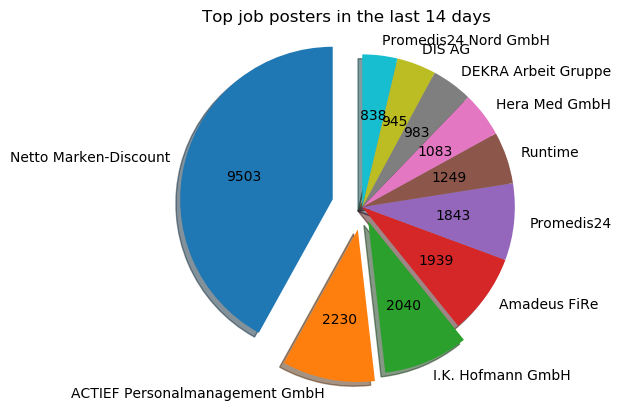

In [11]:
explode = (0.2, 0.15, 0.1, 0, 0, 0, 0, 0, 0, 0)
plt.style.use('default')
plt.pie(values[0:10],
        labels=lval[0:10],
        explode=explode,
        shadow=True,
        autopct=lambda p: '{:.0f}'.format(p * total / 100),
       startangle=90)
plt.axis('equal')
#plt.legend(title='Company', loc='outside')
plt.title('Top job posters in the last 14 days')
plt.show()

### The last 7 days:

In [12]:
labels = [col for col in df if 'company' in col if 'Ads' not in col]
lval = df[labels].values[-7]
data = [col for col in df if 'company' in col if 'Ads' in col]
values = df[data].values[-7]
total = sum(values[0:10])

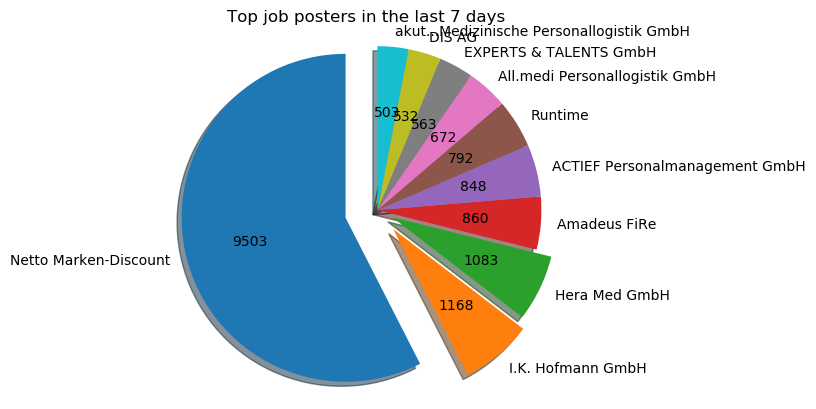

In [13]:
explode = (0.2, 0.15, 0.1, 0, 0, 0, 0, 0, 0, 0)
plt.style.use('default')
plt.pie(values[0:10],
        labels=lval[0:10],
        explode=explode,
        shadow=True,
        autopct=lambda p: '{:.0f}'.format(p * total / 100),
       startangle=90)
plt.axis('equal')
#plt.legend(title='Company', loc='outside')
plt.title('Top job posters in the last 7 days')
plt.show()

## 3.2 Job types

### Bar chart for each job type:

C:\Users\AGrze\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


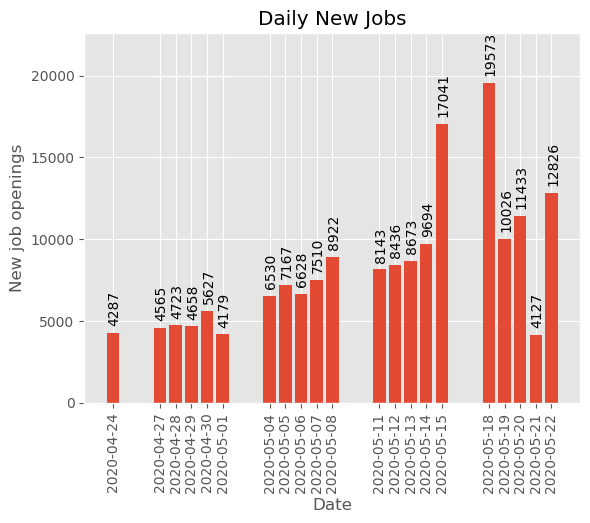

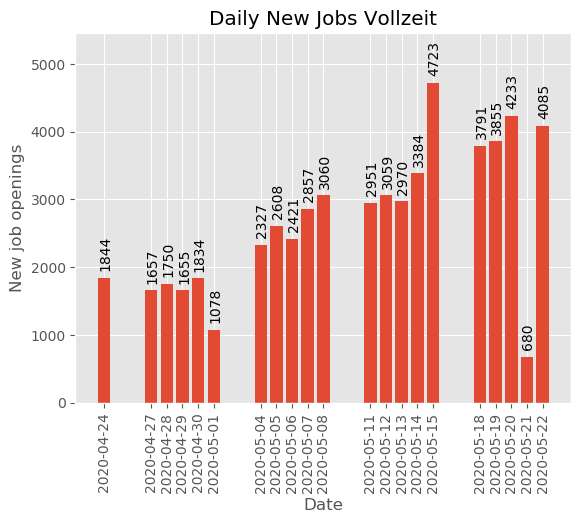

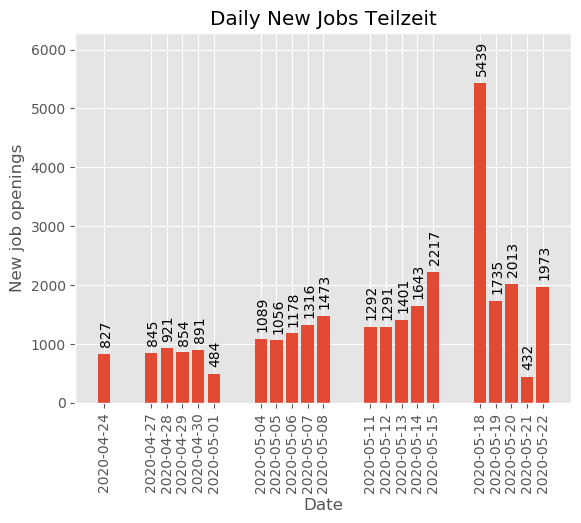

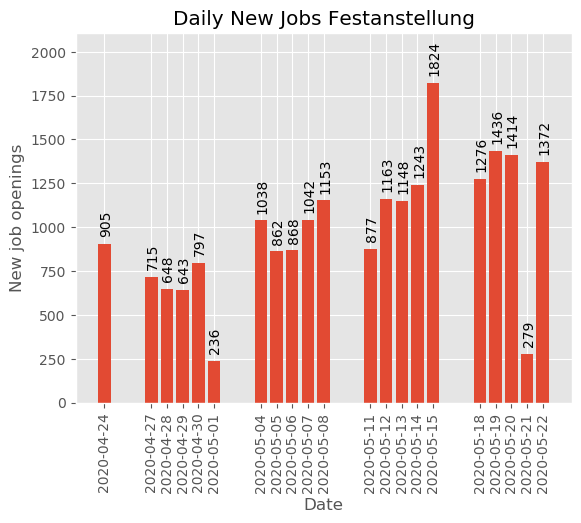

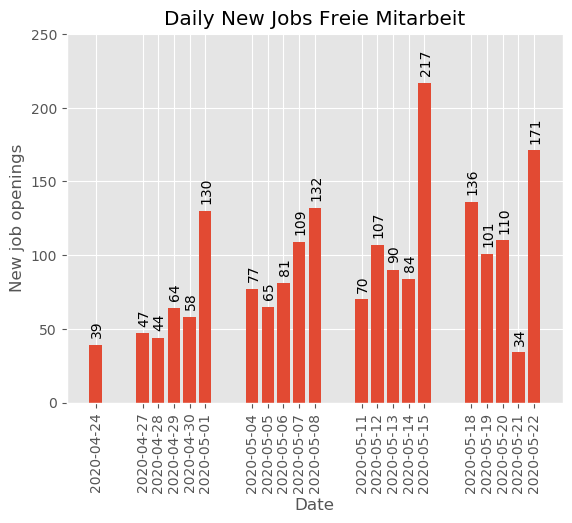

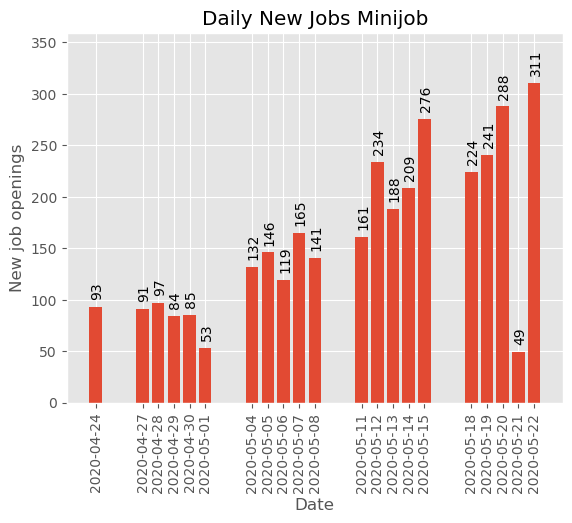

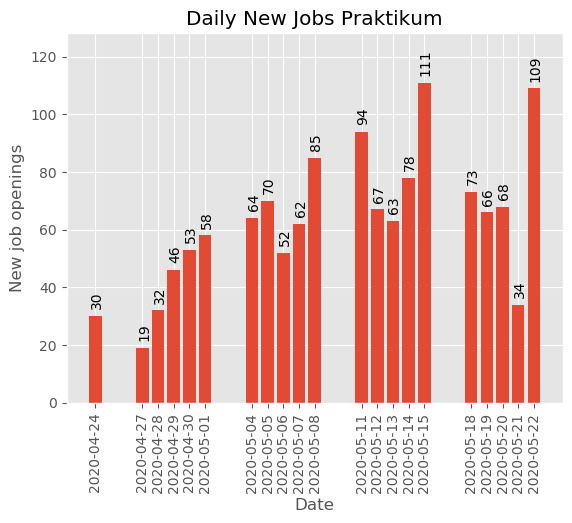

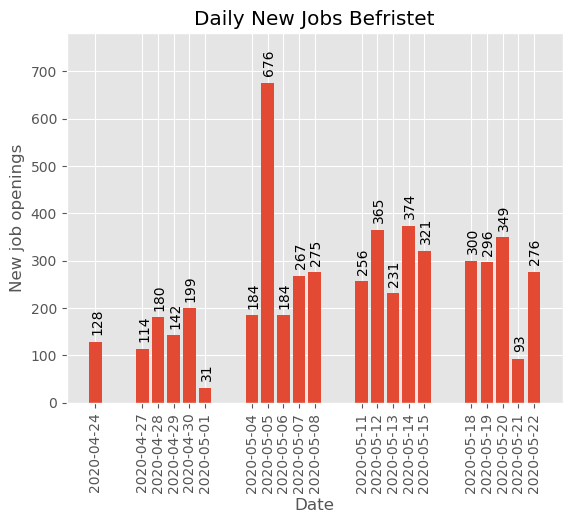

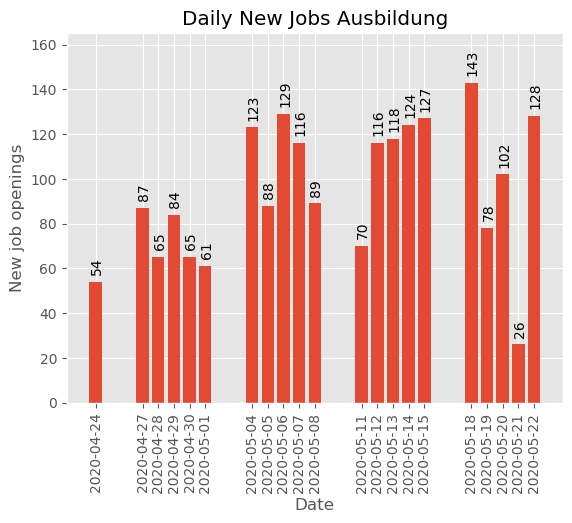

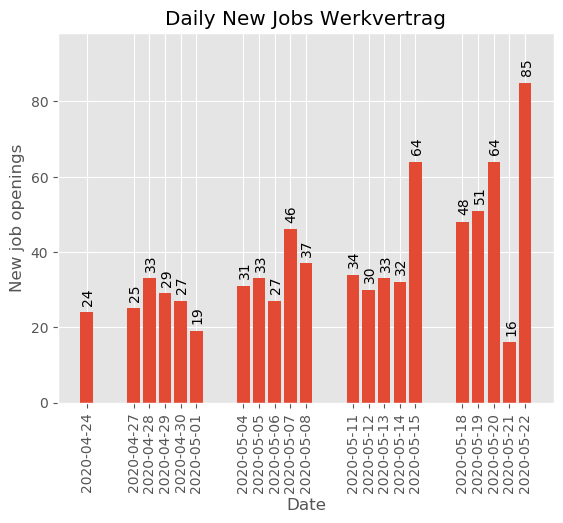

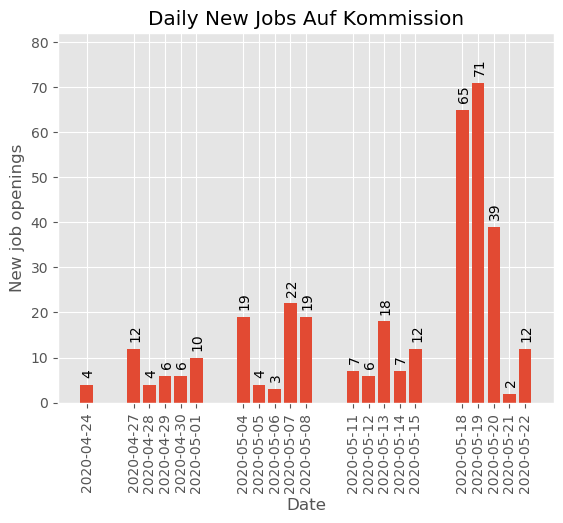

In [14]:
for column in df_jobs_type:
    if 'dtd' in column:
        x = df_jobs_type.index
        y = df_jobs_type[column]
        col_name = column.replace('dtd_','')
        plt.style.use('ggplot')
        plt.bar(x,y)
        if 'jobs' not in column:
            plt.title('Daily New Jobs '+ col_name)
        else:
            plt.title('Daily New Jobs')
        plt.xlabel('Date')
        plt.ylabel('New job openings')
        plt.xticks(df_jobs_type.index, rotation=90)
        ticks = [tick for tick in plt.ylim()]
        plt.ylim(ticks[0], ticks[-1]*1.1)
        xlocs, xlabs = plt.xticks()
        for i, v in enumerate(y):
            plt.text(xlocs[i]-0.35, v+ticks[-1]*0.03, str(v), rotation=90)
        plt.show()

### Comparison full-time vs part-time:

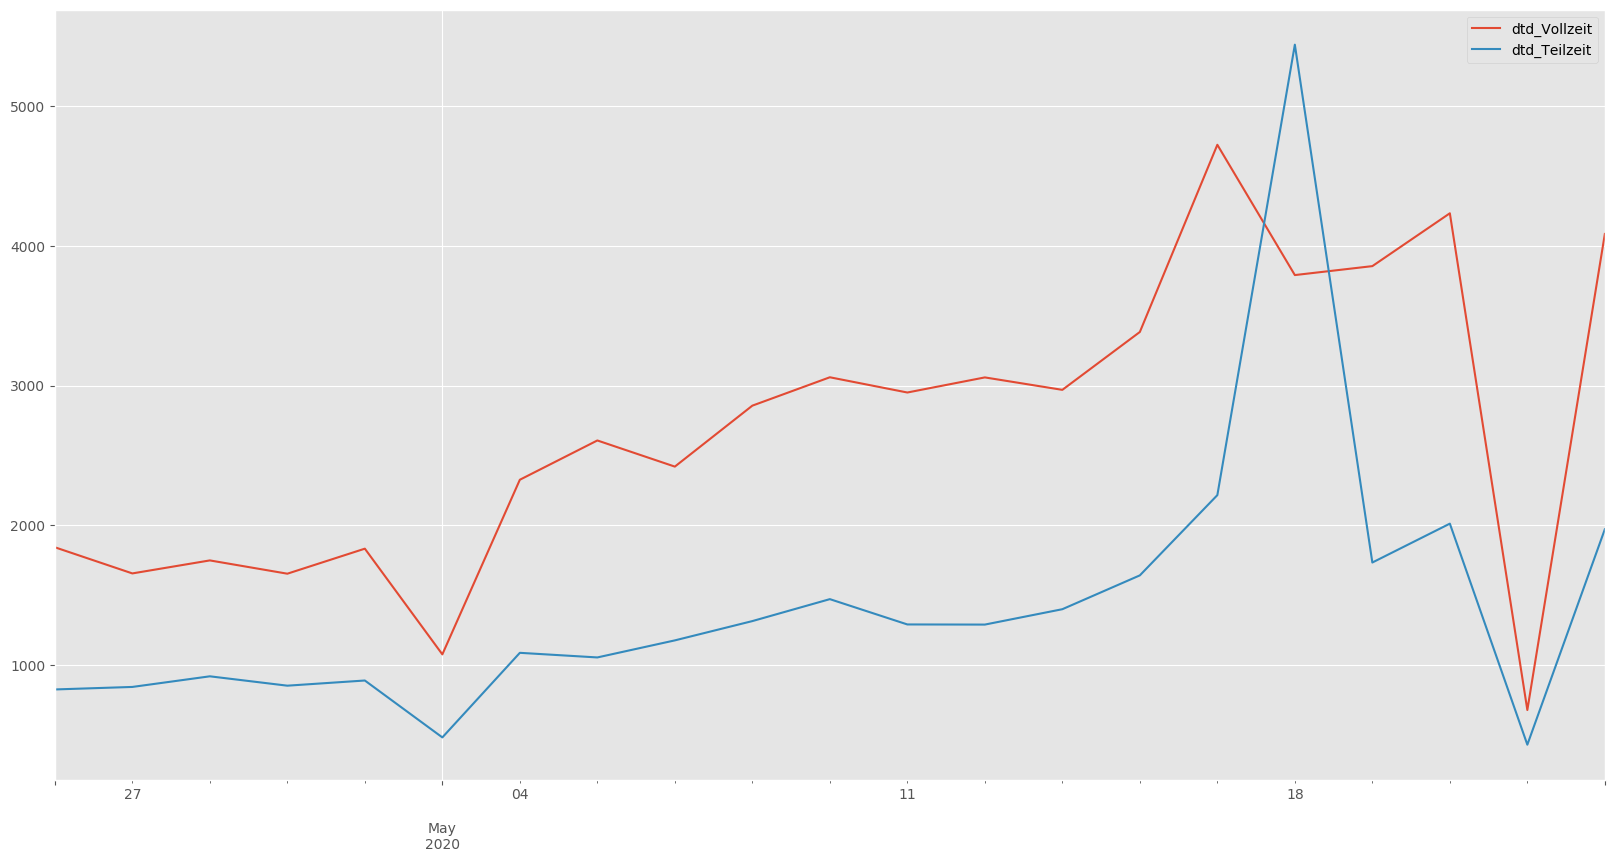

In [15]:
df_jobs_type[['dtd_Vollzeit', 'dtd_Teilzeit']].plot(figsize=(20,10))

## 3.3 Cities

### Bar chart for each city:

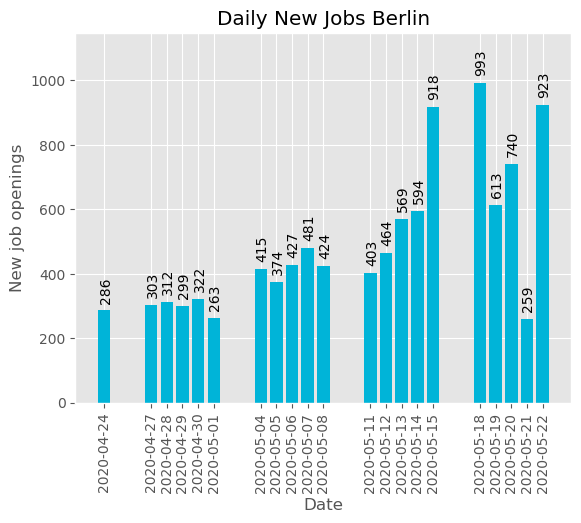

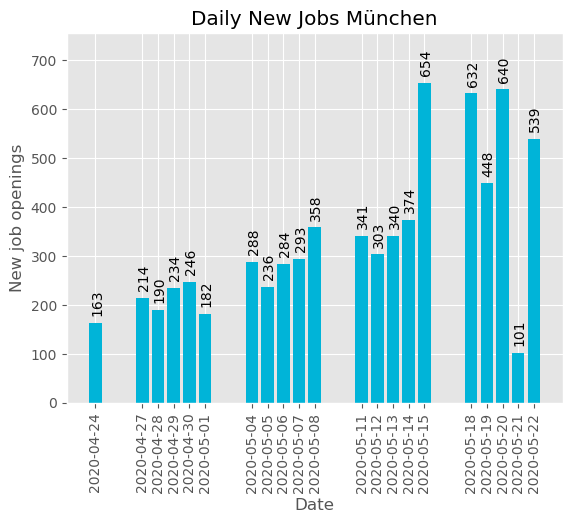

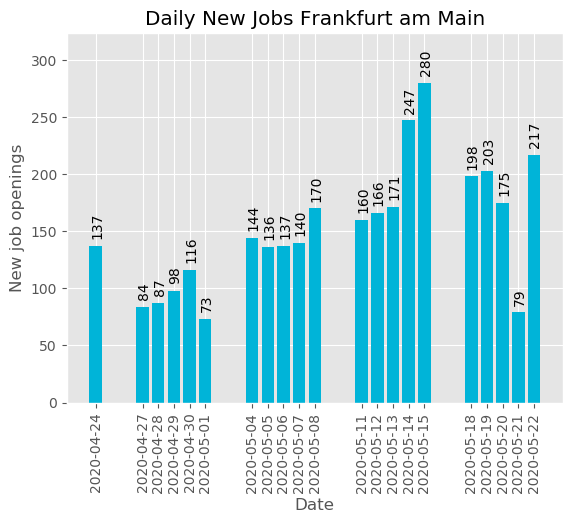

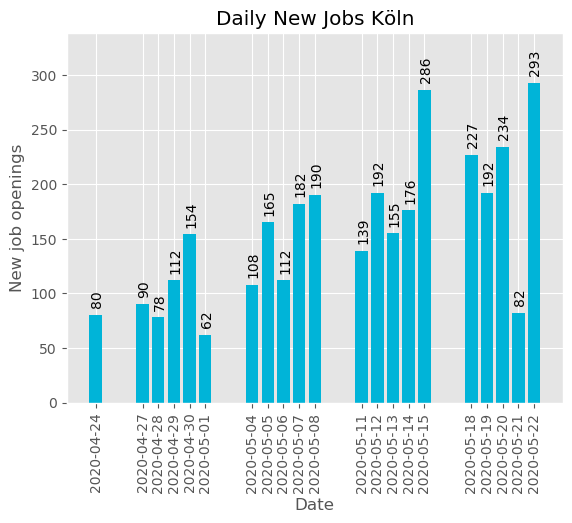

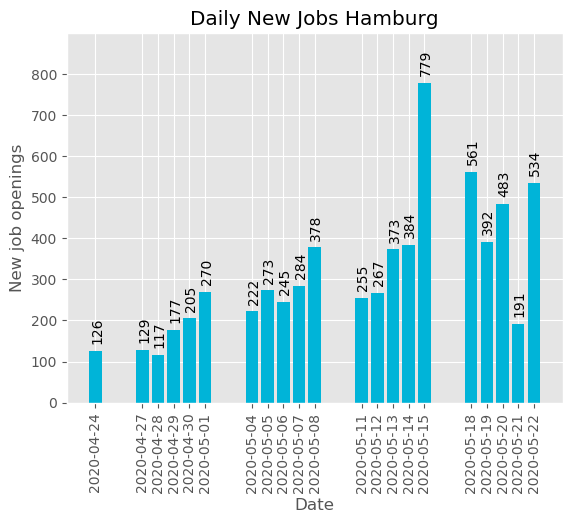

In [16]:
for column in df_cities:
    if 'dtd' in column:
        x = df_cities.index
        y = df_cities[column]
        col_name = column.replace('dtd_','')
        plt.style.use('ggplot')
        plt.bar(x,y, color='#00b4d8')
        if 'jobs' not in column:
            plt.title('Daily New Jobs '+ col_name)
        else:
            plt.title('Daily New Jobs')
        plt.xlabel('Date')
        plt.ylabel('New job openings')
        plt.xticks(df_cities.index, rotation=90)
        ticks = [tick for tick in plt.ylim()]
        plt.ylim(ticks[0], ticks[-1]*1.1)
        xlocs, xlabs = plt.xticks()
        for i, v in enumerate(y):
            plt.text(xlocs[i]-0.35, v+ticks[-1]*0.03, str(v), rotation=90)
        plt.show()

### Comparison of day-to-day change between the cities:

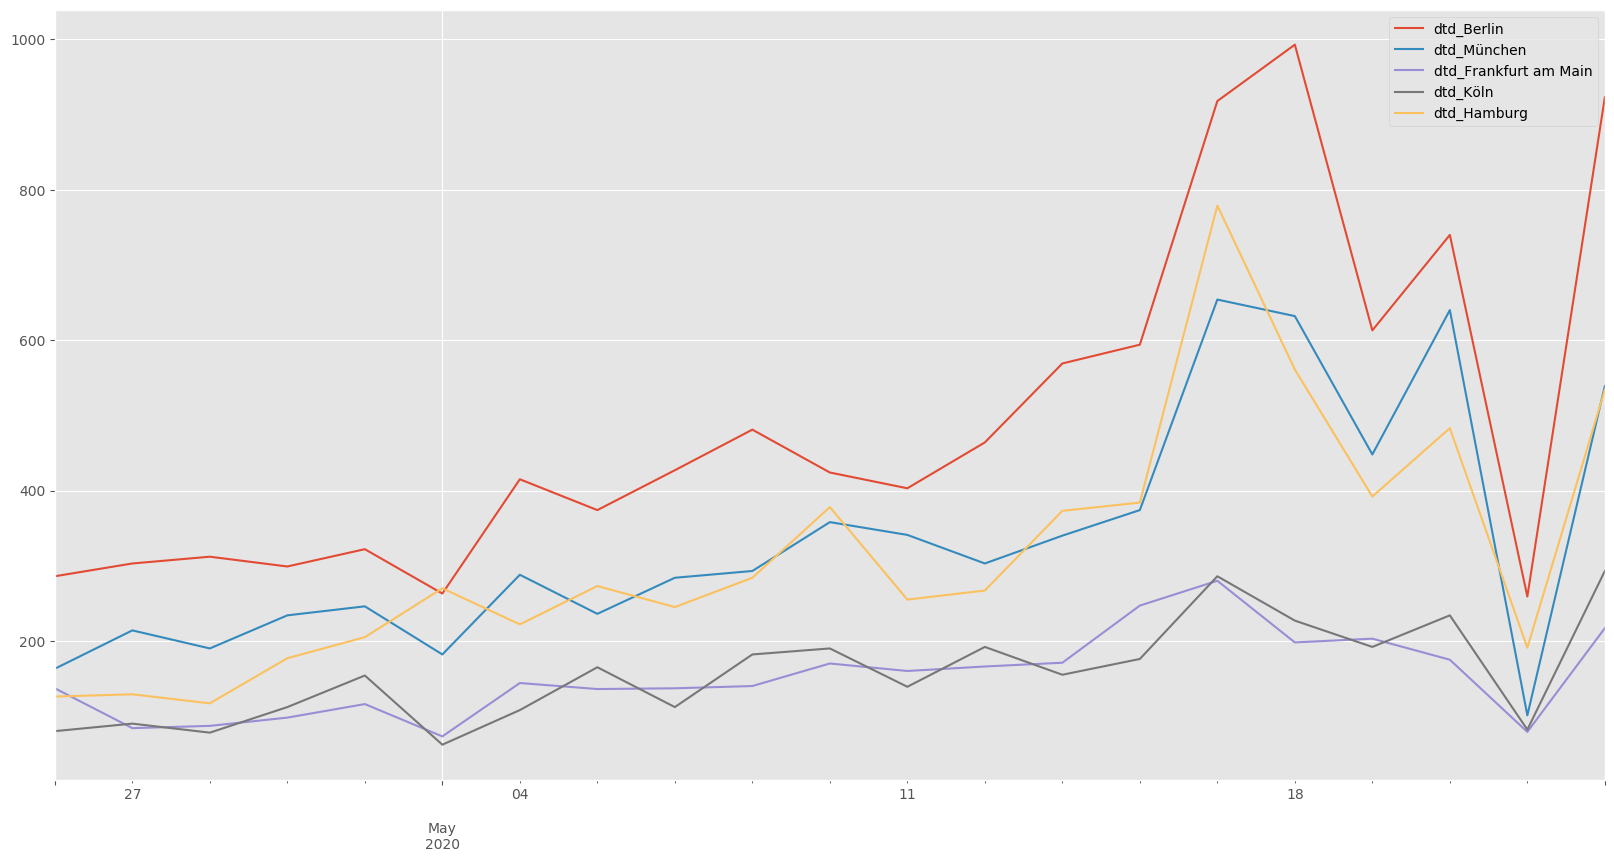

In [17]:
df_cities[['dtd_Berlin',
 'dtd_München',
 'dtd_Frankfurt am Main',
 'dtd_Köln',
 'dtd_Hamburg']].plot(figsize=(20,10))

# 4. Creating a map

In [18]:
import folium
import base64
from folium import IFrame

In [19]:
m = folium.Map(
    location=[51.5167, 9.9167],
    zoom_start=6
)
image = 'img.png'
encoded = base64.b64encode(open(image, 'rb').read())
html = '<img src="data:image/png;base64,{}">'.format
#print(20*'-',encoded.decode('UTF-8'))
iframe = IFrame(html(encoded.decode('UTF-8')), width=700, height=700)
popup = folium.Popup(iframe, max_width=700)
#width=(width*resolution)+20, height=(height*resolution)+20


folium.CircleMarker(
    location=[52.30, 13.25],
    radius=50,
    popup=popup,
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)


m